# Session 7

In [2]:
import pandas as pd

#### Create from dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [3]:
population_dict = {'California': 38332521,  #Key   Value
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135
                   }


population = pd.Series(population_dict)
population

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [ ]:
population.values

array([38332521, 26448193, 19651127, 19552860, 12882135])

In [ ]:
population.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [4]:
population['California']

38332521

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [5]:
population

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [7]:
population[1:3] # 3 exclusive

,0
Texas,26448193
New York,19651127


In [8]:
population[0:4]

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860


In [ ]:
population

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


**Task**


1- create  dictionary 10 numbers (Key : value) number : square(number)

2- create series using dictionary

3- print range 5 to 9  (9 inclusive)

4- print index = 3

5- print index = 11

In [ ]:
dict = {1:1,
        2:4,
        3:9}

In [9]:
dictt = {x:x**2 for x in range (0,10)}
dictt

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

In [11]:
dict_s = pd.Series(dictt)
dict_s

,0
0,0
1,1
2,4
3,9
4,16
5,25
6,36
7,49
8,64
9,81


In [ ]:
dict_s[5:10]  # 10 exclusive

,0
5,25
6,36
7,49
8,64
9,81


In [12]:
dict_s[3]

9

In [13]:
dict_s[11]

KeyError: 11

### Pandas Data Frame
Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns.

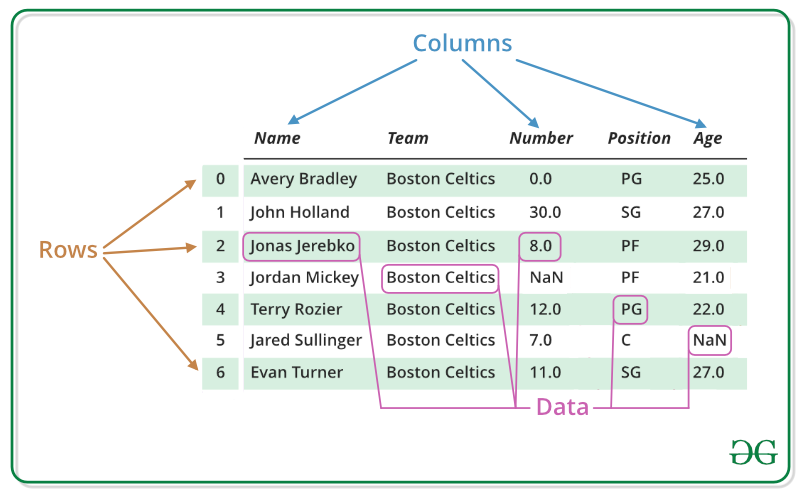

Reference: https://www.geeksforgeeks.org/python-pandas-dataframe/

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [14]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

population = pd.Series(population_dict)

pd.DataFrame(population,columns=['Population'])

,Population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [17]:
stu_d = {'mah':5,
         'ahm':2.5,
         'kar':4}

stu_s  = pd.Series(
                    stu_d
                   )

stu_df = pd.DataFrame(
                      stu_s,
                      columns=['GPA']
                      )
stu_df



,GPA
mah,5.0
ahm,2.5
kar,4.0


In [21]:
stu_df.reset_index(inplace=True)  # inplace  > save


In [22]:
stu_df

,index,GPA
0,mah,5.0
1,ahm,2.5
2,kar,4.0


Task

Create Data Frame with Names and Salaries

then reset index

In [23]:
stu_df

,index,GPA
0,mah,5.0
1,ahm,2.5
2,kar,4.0


In [24]:
stu_df.rename(columns={'index':'Names'},inplace=True)

In [25]:
stu_df

,Names,GPA
0,mah,5.0
1,ahm,2.5
2,kar,4.0


#### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [26]:
import pandas as pd

row1 = {'Name': 'Mahmoud' , 'Number': 1500 ,'Age': 28 }
row2 = {'Name': 'Ahmed'   , 'Number': 985 , 'Age': 35 }

#       Key > column name  , value > row value

In [27]:
df1 = pd.DataFrame( [row1,row2] )
df1

,Name,Number,Age
0,Mahmoud,1500,28
1,Ahmed,985,35


task

Create dataframe

3 rows

3 columns

Name  Salary  City

In [30]:
df1

,Name,Number,Age
0,Mahmoud,1500,28
1,Ahmed,985,35


In [31]:
df1.shape

(2, 3)

In [32]:
df1.dtypes

,0
Name,object
Number,int64
Age,int64


#### Indexers: loc, iloc, and ix

These slicing and indexing conventions can be a source of confusion.
For example, if your ``Series`` has an explicit integer index, an indexing operation such as ``data[1]`` will use the explicit indices, while a slicing operation like ``data[1:3]`` will use the implicit Python-style index.

In [35]:
data = pd.Series(['Molham', 'Glitch', 'Heba','Yousef','Sara'],
                 index=[1, 3, 5,6,8])
data

,0
1,Molham
3,Glitch
5,Heba
6,Yousef
8,Sara


In [37]:
# explicit index when indexing
data[1]  # human eye

'Molham'

In [38]:
# implicit index when slicing
data[1:3]  # computer

,0
3,Glitch
5,Heba


### Data Selection in DataFrame

Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

#### DataFrame as a dictionary

The first analogy we will consider is the ``DataFrame`` as a dictionary of related ``Series`` objects.
Let's return to our example of areas and populations of states:

In [39]:
import pandas as pd

3 rows  2 columns

columns name  = City    ,  Pop

In [40]:
row_1 = {'City': 'Alex', 'Pop': 655500 , 'True' : 2500}    # Column name and value
row_2 = {'City': 'Mecca', 'Pop': 254400 , 'True' : 9820}    # Column name and value


data = pd.DataFrame([row_1, row_2])
data

,City,Pop,True
0,Alex,655500,2500
1,Mecca,254400,9820


The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed via dictionary-style indexing of the column name:

In [41]:
data['True']

,True
0,2500
1,9820


Equivalently, we can use attribute-style access with column names that are strings:

In [42]:
data.City

,City
0,Alex
1,Mecca


In [43]:
data.True    # Reserved word

SyntaxError: invalid syntax (<ipython-input-43-92fdf75dc848>, line 1)

In [44]:
data.Pop   # pop

,Pop
0,655500
1,254400


This attribute-style column access actually accesses the exact same object as the dictionary-style access:

In [45]:
data.Pop is data['Pop']

True

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict with methods of the ``DataFrame``, this attribute-style access is not possible.
For example, the ``DataFrame`` has a ``pop()`` method, so ``data.pop`` will point to this rather than the ``"pop"`` column:

In [ ]:
data

,City,Pop,True
0,Alex,655500,2500
1,Mecca,254400,9820


In particular, you should avoid the temptation to try column assignment via attribute (i.e., use ``data['pop'] = z`` rather than ``data.pop = z``).

Like with the ``Series`` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [46]:
data

,City,Pop,True
0,Alex,655500,2500
1,Mecca,254400,9820


Task  

change column true to Area

In [47]:
data.rename(columns = {'True':'Area'},inplace=True)

Feature Engineering

In [48]:
import pandas as pd

row_1 = {'City': 'Alex', 'Pop': 655500 , 'Area' : 2500}    # Column name and value
row_2 = {'City': 'Mecca', 'Pop': 254400 , 'Area' : 9820}    # Column name and value


data = pd.DataFrame([row_1, row_2])
data

,City,Pop,Area
0,Alex,655500,2500
1,Mecca,254400,9820


In [ ]:
data['Density'] =  data['Pop'] / data['Area']
data

,City,Pop,Area,Density
0,Alex,655500,2500,262.200000
1,Mecca,254400,9820,25.906314


This shows a preview of the straightforward syntax of element-by-element arithmetic between ``Series`` objects; we'll dig into this further in [Operating on Data in Pandas](03.03-Operations-in-Pandas.ipynb).

With this picture in mind, many familiar array-like observations can be done on the ``DataFrame`` itself.
For example, we can transpose the full ``DataFrame`` to swap rows and columns:

In [49]:
data.T #transpose

,0,1
City,Alex,Mecca
Pop,655500,254400
Area,2500,9820


When it comes to indexing of ``DataFrame`` objects, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy array.
In particular, passing a single index to an array accesses a row:

In [50]:
data

,City,Pop,Area
0,Alex,655500,2500
1,Mecca,254400,9820


In [51]:
data['Area']

,Area
0,2500
1,9820


**Task**

Create Dataframe with 5 rows with 3 columns  

1- first column names of students

2- second column is age of them

3- GPA

what to do ?

    1- create new column with multiply age by 5

**Bonus**

    2- make columns name is index
    3- call any student by his name to print rest of data

In [ ]:
import pandas as pd


In [ ]:
row_1 = {'Name': 'Ahmed',   'Age': 25 , 'GPA' : 4}    # Column name and value
row_2 = {'Name': 'Mahmoud', 'Age': 43 , 'GPA' : 2.5}    # Column name and value
row_3 = {'Name': 'Sara',    'Age': 33 , 'GPA' : 3}

data = pd.DataFrame([row_1, row_2,row_3])
data

,Name,Age,GPA
0,Ahmed,25,4.0
1,Mahmoud,43,2.5
2,Sara,33,3.0


In [ ]:
data

,Name,Age,GPA
0,Ahmed,25,4.0
1,Mahmoud,43,2.5
2,Sara,33,3.0
